# 0. Import Libraries & Dataset

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# df = pd.read_csv('Image_classification_data/data_labels_mainData.csv')

In [2]:
import tensorflow
import pandas as pd
import numpy as np
from PIL import Image
print(tensorflow.__version__)

2.10.0


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# !ls /content/drive/'MyDrive'/'COSC2673'

In [5]:
# ! pwd

In [6]:
# locationMain = "/content/drive/MyDrive/COSC2673/Image_classification_data/data_labels_mainData.csv"
# locationExtra = "/content/drive/MyDrive/COSC2673/Image_classification_data/data_labels_extraData.csv"

locationMain = "./Image_classification_data/data_labels_mainData.csv"
locationExtra = "./Image_classification_data/data_labels_extraData.csv"
dfMain = pd.read_csv(locationMain)
dfExtra = pd.read_csv(locationExtra)

# 1. Exploratory Data Analysis

In [7]:
# Checks the number of rows and columns of the main and extra dataset
print("Number of rows:", dfMain.shape[0], "\t Number of columns:", dfMain.shape[1])
print("Number of rows:", dfExtra.shape[0], "\t Number of columns:", dfExtra.shape[1])

Number of rows: 9896 	 Number of columns: 6
Number of rows: 10384 	 Number of columns: 4


In [9]:
# Check the first few data of the main dataset
dfMain.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [10]:
# Check the first few data of the extra dataset
dfExtra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [11]:
# Check if the main dataset has any missing values
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


In [12]:
# Check if the extra dataset has any missing values
dfExtra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


In [13]:
# Check the data types for each column of main dataset
dfMain.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

In [14]:
cancerous = dfMain[dfMain.isCancerous == 1]
benign = dfMain[dfMain.isCancerous == 0]
cancerous.shape

(4079, 6)

In [15]:
benign.shape

(5817, 6)

In [16]:
# dfMain['isCancerous'].value_counts()

for i,v in dfMain['isCancerous'].value_counts().items():
    print(i,v)

0 5817
1 4079


In [17]:
# Check the data types for each column of extra dataset
dfExtra.dtypes

InstanceID      int64
patientID       int64
ImageName      object
isCancerous     int64
dtype: object

In [18]:
# Function to plot bar plots
def bar_plot(series,title,labels=[]):
#   Get the axes of the plot
    ax = plt.axes()
    ax.set_xticks([x for x in range(0,series.nunique())])
    
#   Plot the count for different values
    series.value_counts().plot(kind='bar')
    
#   Set the title of the plot
    plt.title(title)
    
#   Label each bar with the total number / value
    ax.bar_label(ax.containers[0])

#   Manaully set the x ticks or use the provided
    if len(labels) > 0:
        ax.set_xticklabels(labels,rotation=0)
    else:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
        
#   Provide the x and y label
    plt.ylabel("Number")
    plt.xlabel("Cell Status")

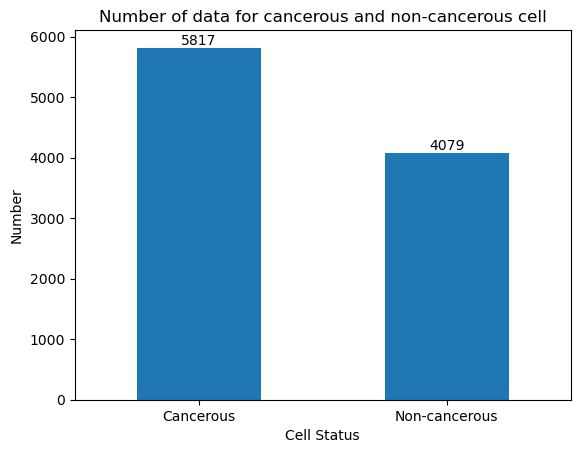

In [19]:
# Plot the number of data for different cancer class in main dataset
title = "Number of data for cancerous and non-cancerous cell"
labels = ['Cancerous','Non-cancerous']
bar_plot(dfMain['isCancerous'],title,labels)

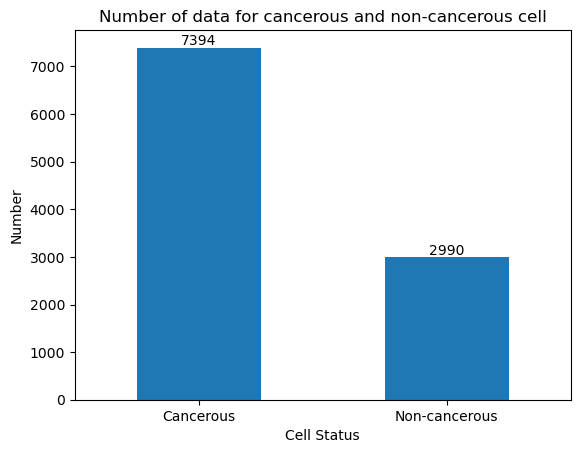

In [20]:
# Plot the number of data for different cancer class in extra dataset
title = "Number of data for cancerous and non-cancerous cell"
labels = ['Cancerous','Non-cancerous']
bar_plot(dfExtra['isCancerous'],title,labels)

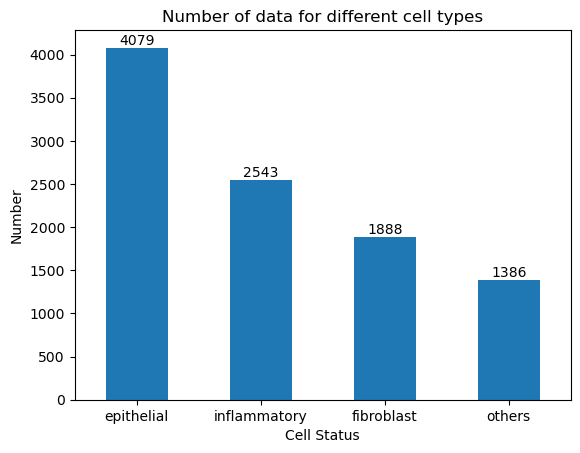

In [21]:
# Plot the number of data for different cell type for main dataset
title = "Number of data for different cell types"
bar_plot(dfMain['cellTypeName'],title)

In [22]:
# Function to plot and annotate a grouped bar plot
def group_bar(crosstab,title,labels=[]):
#   Initialize subplots
    fig,ax = plt.subplots()
    
#   Plot the bar
    bars = crosstab.plot.bar(ax = ax)
    
#   Set the title of the plot
    plt.title(title)
    
#   Set the xticks manaully or use the default
    if len(labels) > 1:
        plt.xticks(crosstab.index,labels,rotation=0)
        
#   Annotate the bara if the value is > 0
    for bar in bars.containers:
        labels = [h if (h := a.get_height()) != 0 else '' for a in bar]
        ax.bar_label(bar,labels)
        
#   Provide the x and y label
    plt.ylabel("Number")
    plt.xlabel("Cell Status")

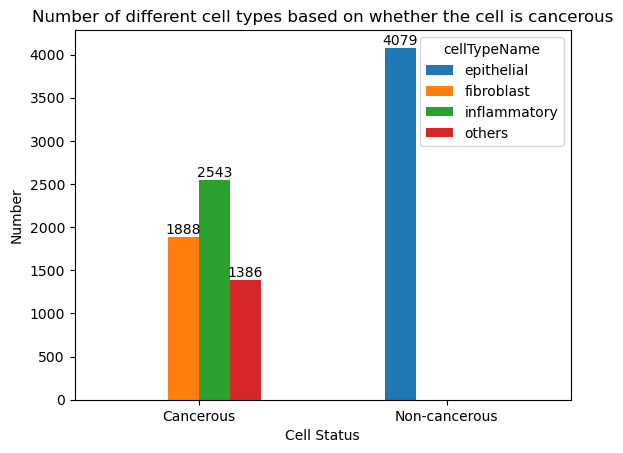

In [23]:
# Plot the number of cell types based on whehter it is cancerous or not
cancell = pd.crosstab(dfMain['isCancerous'],dfMain['cellTypeName'])
group_bar(cancell,
         "Number of different cell types based on whether the cell is cancerous",
          ['Cancerous','Non-cancerous'])

In [24]:
# Load images from zip file
! cp /content/drive/'MyDrive'/'COSC2673'/Image_classification_data/patch_images.zip .
! unzip -q -o patch_images.zip
# ! rm patch

'cp' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
cancerous = dfMain[dfMain['isCancerous'] == 1]
benign = dfMain[dfMain['isCancerous'] == 0]
epithelial = dfMain[dfMain['cellTypeName'] == 'epithelial']
fibroblast = dfMain[dfMain['cellTypeName'] == 'fibroblast']
others = dfMain[dfMain['cellTypeName'] == 'others']
inflammatory = dfMain[dfMain['cellTypeName'] == 'inflammatory']

In [27]:
from math import ceil
# Function to show a set number of random images
def show_images(df,num):
#   Get random data from the dataset
    r_inx = np.random.choice(df.index, num)
    rand_data = df.loc[r_inx,'ImageName']
    
#   Set figure size
    plt.figure(figsize=(16,4))

#   Plot the images where every row has maximum 5 images
    for i, image_path in enumerate(rand_data):
        im = np.asarray(Image.open('./Image_classification_data/patch_images/'+image_path))
        plt.subplot(ceil(num/5),5,i+1)
        plt.imshow(im,cmap='gray')
        plt.axis('off')

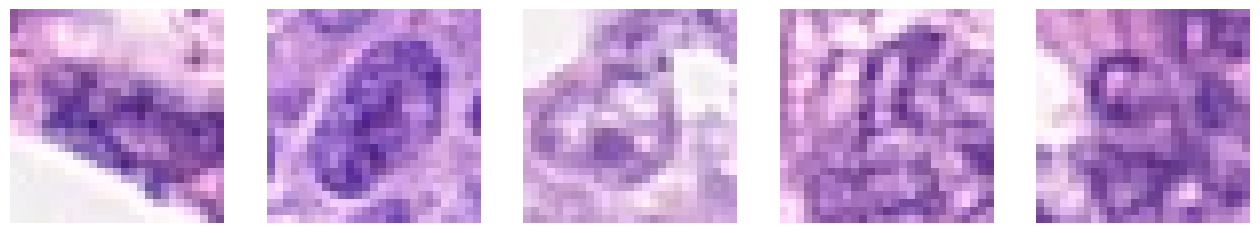

In [28]:
# Show 5 random images of cancerous cells
show_images(cancerous,5)

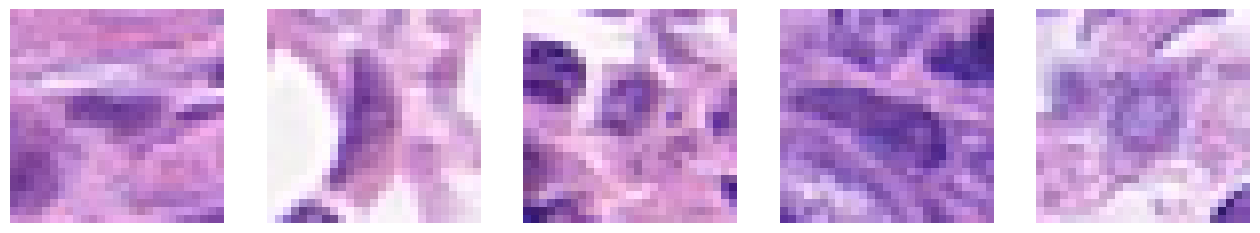

In [29]:
# Show 5 random images of non-cancerous cells
show_images(benign,5)

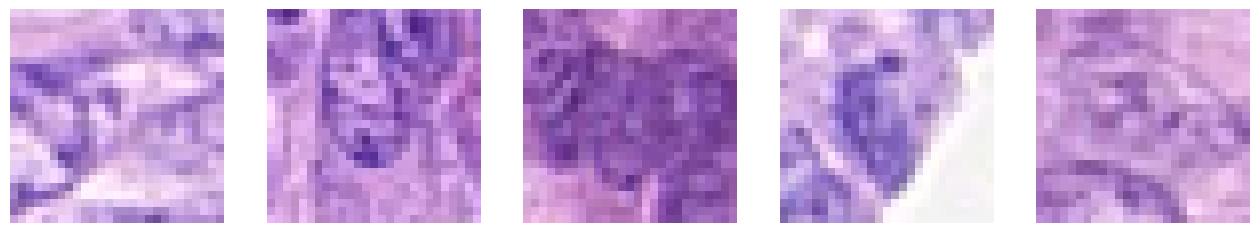

In [30]:
# Show 5 random images of epithelial cells
show_images(epithelial,5)

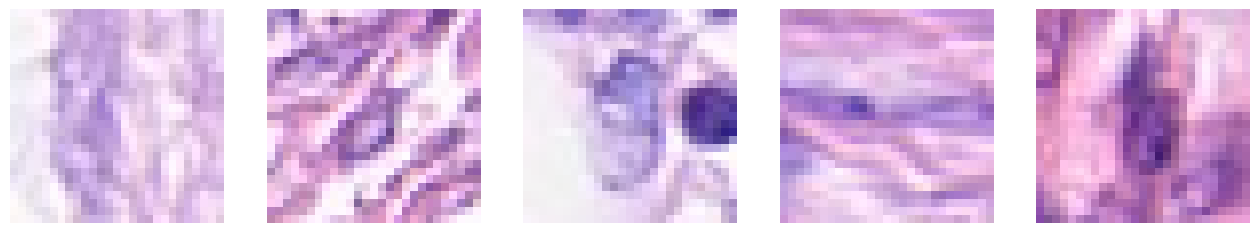

In [31]:
# Show 5 random images of fibroblast cell types
show_images(fibroblast,5)

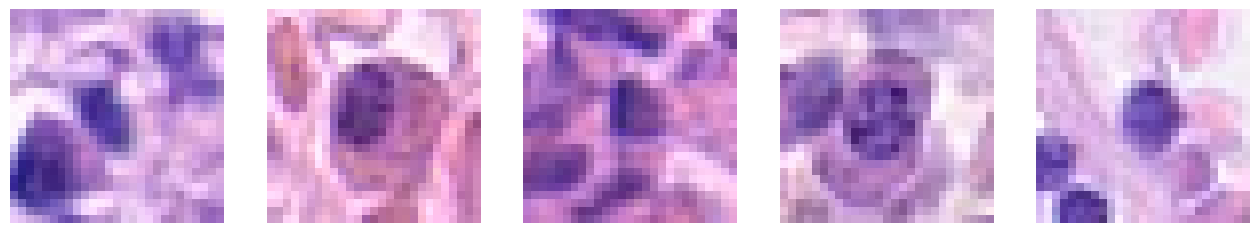

In [32]:
# Show 5 random images of inflammatory cells
show_images(inflammatory,5)

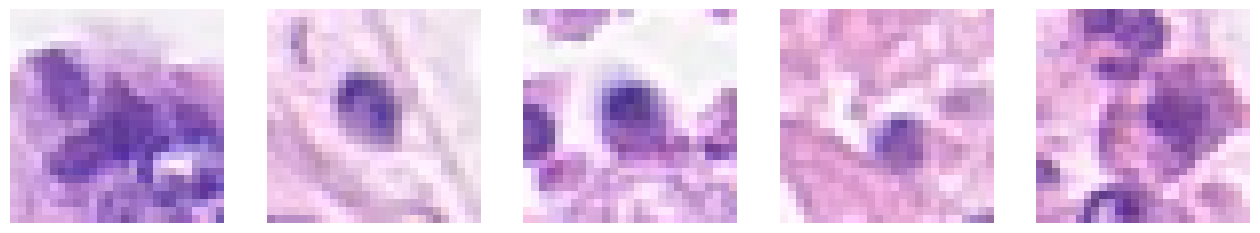

In [33]:
# Show 5 random images of other cell types
show_images(others,5)

## Combining Main Dataset & Extra Dataset

In [43]:
# Concatnate both datasets to form a bigger dataset
dfMain_nocell = dfMain.loc[:, ~dfMain.columns.isin(['cellType','cellTypeName'])]
dfAll = pd.concat([dfMain_nocell, dfExtra])

In [42]:
dfAll

,InstanceID,patientID,ImageName,isCancerous
0,22405,1,22405.png,0
1,22406,1,22406.png,0
2,22407,1,22407.png,0
3,22408,1,22408.png,0
4,22409,1,22409.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [44]:
print("Number of rows:", dfAll.shape[0], "\t Number of columns:", dfAll.shape[1])

Number of rows: 20280 	 Number of columns: 4


In [45]:
dfAll.head()

,InstanceID,patientID,ImageName,isCancerous
0,22405,1,22405.png,0
1,22406,1,22406.png,0
2,22407,1,22407.png,0
3,22408,1,22408.png,0
4,22409,1,22409.png,0


In [47]:
# Print information of a dataset
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20280 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   20280 non-null  int64 
 1   patientID    20280 non-null  int64 
 2   ImageName    20280 non-null  object
 3   isCancerous  20280 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 792.2+ KB


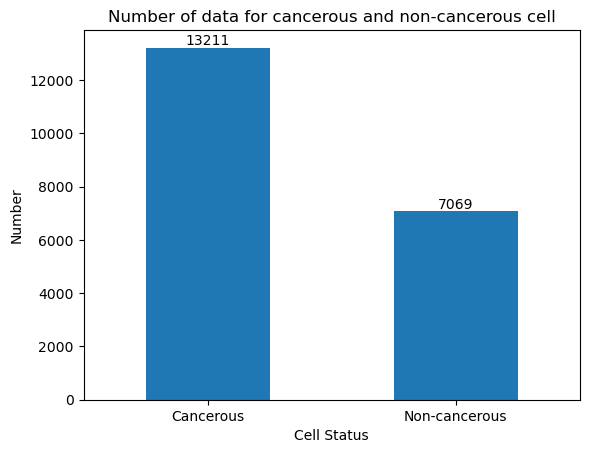

In [48]:
# Plot the number of data for different cancer class in combined dataset
title = "Number of data for cancerous and non-cancerous cell"
labels = ['Cancerous','Non-cancerous']
bar_plot(dfAll['isCancerous'],title,labels)